Today we're going to do a t-test, but first let's read in our data & set up our environment.

In [1]:
# load in our libraries
import pandas as pd # pandas for data frames
from scipy.stats import ttest_ind # just the t-test from scipy.stats
from scipy.stats import probplot # for a qqplot
import matplotlib.pyplot as plt # for a qqplot
import pylab #

# read in our data
cereals = pd.read_csv("../input/cereal.csv")
# check out the first few lines
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


We should make sure that the variable is normally distributed (spoiler: I checked that it was beforehand ;) so let's use a qq-polt to do that.

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

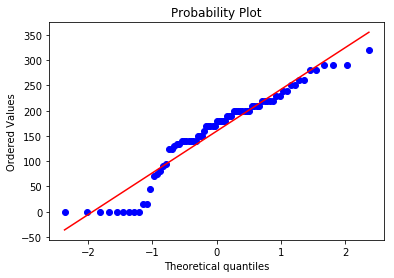

In [2]:
# plot a qqplot to check normality. If the varaible is normally distributed, most of the points 
# should be along the center diagonal.
probplot(cereals["sodium"], dist="norm", plot=pylab)

Preform our t-test.

In [3]:
# get the sodium for hot cerals
hotCereals = cereals["sodium"][cereals["type"] == "H"]
# get the sodium for cold ceareals
coldCereals = cereals["sodium"][cereals["type"] == "C"]

# compare them
ttest_ind(hotCereals, coldCereals, equal_var=False)

Ttest_indResult(statistic=-4.8963576189325932, pvalue=0.024114820819458219)

So, if we decided to set our alpha (the highest p-value that would still allow us to reject the null) to 0.05 before we started, we would reject the null (i.e. can be pretty sure that there's not not a difference between these two groups). Statistic is the actual value of the t-test, and the pvalue is the probability that we saw a difference this large between our two groups just due to chance if they were actually drawn from the same underlying population.

In [4]:
# let's look at the means (averages) of each group to see which is larger
print("Mean sodium for the hot cereals:")
print(hotCereals.mean())

print("Mean sodium for the cold cereals:")
print(coldCereals.mean())

Mean sodium for the hot cereals:
26.666666666666668
Mean sodium for the cold cereals:
165.06756756756758


Now plot for the two cereal types, with each as a different color.

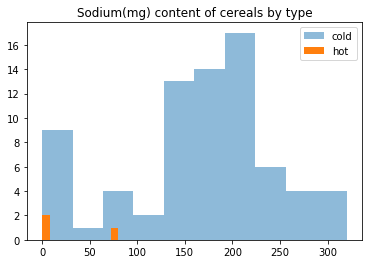

In [5]:
# plot the cold cereals
plt.hist(coldCereals, alpha=0.5, label='cold')
# and the hot cereals
plt.hist(hotCereals, label='hot')
# and add a legend
plt.legend(loc='upper right')
# add a title
plt.title("Sodium(mg) content of cereals by type")